In [1]:
pip install scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


El conjunto de datos Iris es uno de los conjuntos de datos más conocidos y utilizados en el campo de machine learning y análisis de datos. Fue introducido por el biólogo y estadístico británico Ronald A. Fisher en 1936 y, desde entonces, ha sido ampliamente utilizado como ejemplo para la clasificación de patrones.

Descripción: Es un conjunto de datos multiclase que contiene características de tres especies diferentes de flores Iris:

* Iris setosa
* Iris versicolor
* Iris virginica

Número de muestras: 150 observaciones (o muestras) de flores, con 50 muestras para cada especie de Iris.



In [1]:
# Importación de librerías necesarias
from sklearn import datasets  # Carga conjuntos de datos disponibles en scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Importa el clasificador de árboles de decisión
from sklearn.model_selection import KFold, cross_val_score  # Herramientas para validación cruzada
import matplotlib.pyplot as plt #importa el módulo pyplot de la librería Matplotlib 
import seaborn as sns
import pandas as pd

* datasets: Permite cargar conjuntos de datos predefinidos en scikit-learn, como Iris o Digits.
* DecisionTreeClassifier: Un algoritmo de aprendizaje supervisado que se utiliza para clasificación basado en árboles de decisión.
* KFold: Herramienta para dividir los datos en K subconjuntos para validación cruzada.
* cross_val_score: Realiza la validación cruzada, calcula la precisión o métrica especificada en cada uno de los K subconjuntos.

In [5]:
# Carga el conjunto de datos Iris
X, y = datasets.load_iris(return_X_y=True)  # Carga las características (X) y las etiquetas (y) del conjunto de datos Iris

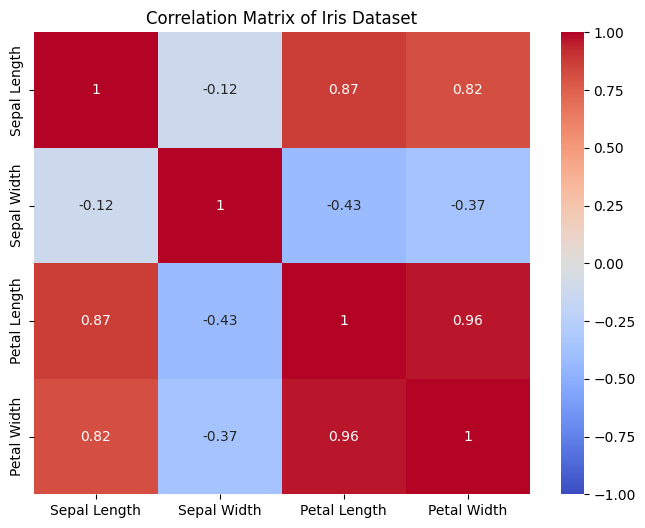

In [6]:
# Convertir X a un DataFrame para facilidad de manejo y visualización
iris_data = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Crear el gráfico de correlación (Heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

* datasets.load_iris(): Carga el conjunto de datos Iris, que es un conjunto de datos muy utilizado en clasificación. Contiene características de flores Iris (como la longitud y el ancho del sépalo y pétalo) y la especie de flor a la que pertenece.
* return_X_y=True: Al establecer este parámetro como True, se retornan directamente las variables independientes (X) y la variable dependiente o etiquetas (y), en lugar de retornar un diccionario con más información.
* El conjunto de datos Iris tiene 150 muestras divididas en 3 clases con 4 características cada una.

Características (Features): Cada muestra se describe por 4 características, que son mediciones físicas de las flores. Las características son:

* Sepal Length: Longitud del sépalo (en centímetros)
* Sepal Width: Ancho del sépalo (en centímetros)
* Petal Length: Longitud del pétalo (en centímetros)
* Petal Width: Ancho del pétalo (en centímetros)

* Clase objetivo (Target): La clase objetivo es la especie de la flor Iris, que puede ser una de las siguientes:

*  0: Iris setosa
*  1: Iris versicolor
*  2: Iris virginica

In [7]:
# Inicialización del clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)  # Crea una instancia del clasificador con un estado aleatorio fijo para reproducibilidad

* DecisionTreeClassifier(): Se utiliza para crear un modelo de árbol de decisión, que es un algoritmo de aprendizaje supervisado adecuado tanto para clasificación como para regresión.
* random_state=42: Fija el estado aleatorio para garantizar que los resultados sean reproducibles. Esto significa que cada vez que se ejecute el código, el modelo generará los mismos resultados debido a la misma semilla aleatoria. El valor "42" es comúnmente utilizado como un número estándar para reproducibilidad en ejemplos

In [8]:
# Definición de los K-Folds para la validación cruzada
k_folds = KFold(n_splits=5)  # Crea una instancia de KFold para dividir los datos en 5 subconjuntos

In [10]:
# Realización de la validación cruzada
scores = cross_val_score(clf, X, y, cv=k_folds)  # Ejecuta la validación cruzada y devuelve las puntuaciones de cada iteración

In [11]:
# Impresión de los resultados de la validación cruzada
print("Cross Validation Scores: ", scores)  # Muestra las puntuaciones obtenidas en cada iteración de la validación cruzada
print("Average CV Score: ", scores.mean())  # Calcula y muestra el promedio de las puntuaciones
print("Number of CV Scores used in Average: ", len(scores))  # Muestra el número de puntuaciones utilizadas para calcular el promedio

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


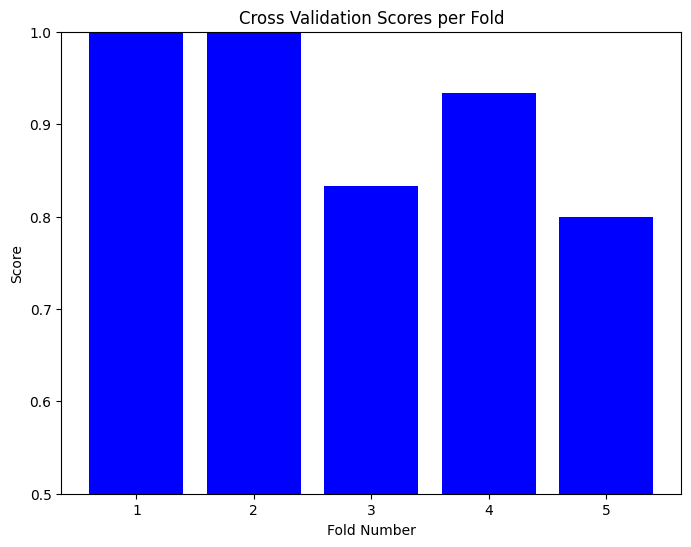

In [12]:
# Crear la gráfica de barras para visualizar los resultados de cada fold
plt.figure(figsize=(8,6))
plt.bar(range(1, len(scores) + 1), scores, color='blue')
plt.xlabel('Fold Number')  # Etiqueta del eje X
plt.ylabel('Score')  # Etiqueta del eje Y
plt.title('Cross Validation Scores per Fold')  # Título de la gráfica
plt.ylim(0.5, 1.00)  # Limitar el eje Y para que vaya de 0.85 a 1.00
plt.xticks(range(1, len(scores) + 1))  # Etiquetas del eje X con el número de fold

# Mostrar la gráfica
plt.show()

El sobreentrenamiento (overfitting) ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, capturando ruido o patrones específicos de los datos de entrenamiento que no se generalizan bien a datos nuevos. Para determinar si hay sobreentrenamiento en este modelo, vamos a analizar los resultados obtenidos de la validación cruzada.

Evaluación del sobreentrenamiento:
Resultados consistentes en los folds: Si las puntuaciones obtenidas en los diferentes folds del proceso de validación cruzada son bastante consistentes entre sí, esto indica que el modelo está generalizando bien en diferentes subconjuntos de datos. En este caso, se esperaría que las puntuaciones en cada fold sean similares y relativamente altas, lo que sugeriría que no hay sobreentrenamiento.

Discrepancias entre los scores: Si observamos una gran variabilidad entre los resultados de los diferentes folds, podría ser una señal de que el modelo está sobreajustado a algunos subconjuntos de datos y no se está desempeñando bien en otros. Esto podría ser un indicativo de sobreentrenamiento.

Promedio de los scores: Un promedio alto de los scores indica que el modelo tiene un buen rendimiento general. Sin embargo, si las puntuaciones individuales varían mucho, puede ser una señal de sobreajuste o de que el modelo no está aprendiendo adecuadamente de todos los datos.

Podemos observar que los resultados en los 5 folds son bastante consistentes y cercanos entre sí. Esto sugiere que el modelo no está sobreentrenado, ya que el rendimiento se mantiene estable en diferentes subconjuntos de los datos.